In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests 
from scipy import stats
import time


In [2]:
data_final = pd.read_csv("../resources/data_final.csv")
data_final.head()

,State,Abbreviation,Total Emergency Depts,Total ED Visit Volume,Cases,Deaths,Death Rate (%),Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate (%),Per Capita EDs (100K),Per Capita Cases,Per Capita Deaths,Per Capita Death Rate
0,Alabama,AL,98,"2,825,756",46078611,728745,1.58,4876250,39.0,50536,27928,795989,16.32,2.01,944.96,14.94,1.48
1,Alaska,AK,20,"261,985",4544475,20735,0.46,737068,34.3,77640,36787,76933,10.44,2.71,616.56,2.81,0.32
2,Arizona,AZ,88,"3,119,364",69132576,1418028,2.05,7050299,37.7,58945,30694,1043764,14.80,1.25,980.56,20.11,2.04
3,Arkansas,AR,79,"1,730,571",27248041,428643,1.57,2999370,38.1,47597,26577,496260,16.55,2.63,908.46,14.29,1.54
4,California,CA,341,"15,787,403",271972863,4177868,1.54,39283497,36.5,75235,36955,5149742,13.11,0.87,692.33,10.64,1.45


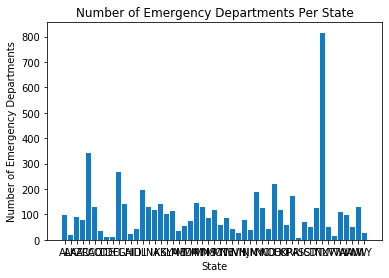

In [3]:
x_axis = data_final["Abbreviation"]
y_axis = data_final["Total Emergency Depts"]
plt.bar(x_axis, y_axis)
plt.title("Number of Emergency Departments Per State")
plt.xlabel("State")
plt.ylabel("Number of Emergency Departments")
plt.show()

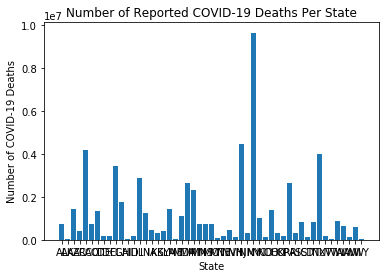

In [4]:
x_axis = data_final["Abbreviation"]
y_axis = data_final["Deaths"]
plt.bar(x_axis, y_axis)
plt.title("Number of Reported COVID-19 Deaths Per State")
plt.xlabel("State")
plt.ylabel("Number of COVID-19 Deaths")
plt.show()

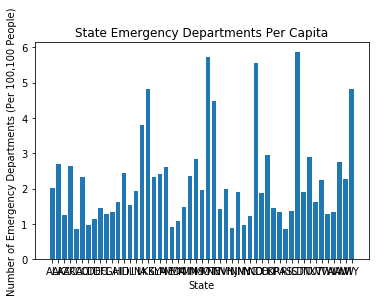

In [5]:
x_axis = data_final["Abbreviation"]
y_axis = data_final["Per Capita EDs (100K)"]
plt.title("State Emergency Departments Per Capita")
plt.xlabel("State")
plt.ylabel("Number of Emergency Departments (Per 100,100 People)")
plt.bar(x_axis, y_axis)
plt.show()

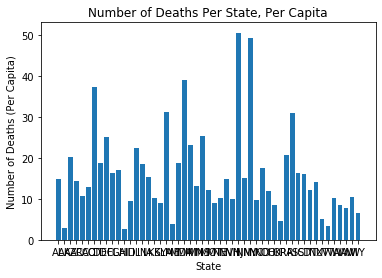

In [6]:
x_axis = data_final["Abbreviation"]
y_axis = data_final["Per Capita Deaths"]
plt.bar(x_axis, y_axis)
plt.title("Number of Deaths Per State, Per Capita")
plt.xlabel("State")
plt.ylabel("Number of Deaths (Per Capita)")
plt.show()

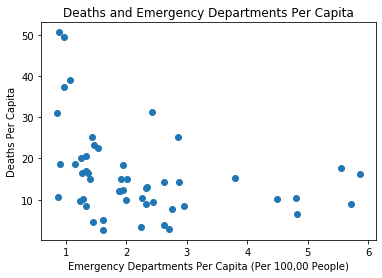

In [7]:
x_axis = data_final["Per Capita EDs (100K)"]
y_axis = data_final["Per Capita Deaths"]
plt.title("Deaths and Emergency Departments Per Capita")
plt.xlabel("Emergency Departments Per Capita (Per 100,00 People)")
plt.ylabel("Deaths Per Capita")
plt.scatter(x_axis, y_axis)
plt.show()

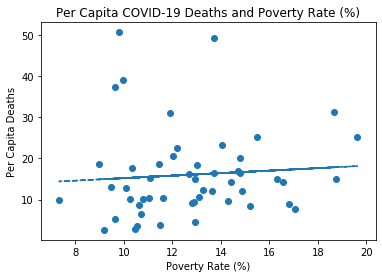

In [8]:
x_axis = data_final["Poverty Rate (%)"]
y_axis = data_final["Per Capita Deaths"]
 # Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * x_axis + vc_int
plt.plot(x_axis, vc_fit, "--")
plt.title("Per Capita COVID-19 Deaths and Poverty Rate (%)")
plt.xlabel("Poverty Rate (%)")
plt.ylabel("Per Capita Deaths")
plt.scatter(x_axis, y_axis)
plt.show()

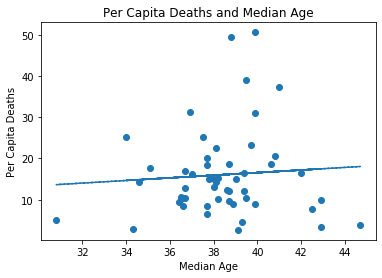

In [9]:
x_axis = data_final["Median Age"]
y_axis = data_final["Per Capita Deaths"]
plt.title("Per Capita Deaths and Median Age")
plt.xlabel("Median Age")
plt.ylabel("Per Capita Deaths")
plt.scatter(x_axis, y_axis)
 # Perform a linear regression on year versus violent crime rate
vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(x_axis, y_axis)
# Create equation of line to calculate predicted violent crime rate
vc_fit = vc_slope * x_axis + vc_int
plt.plot(x_axis, vc_fit, "--")
plt.show()

In [10]:
## Attempted to plot ED's next to Deaths per State
#X = ['Abbreviation']
#Y = ['Per Capita EDs (100K)']
#Z = ['Per Capita Deaths']
#_X = np.arange(len(X))

#plt.bar(_X - 0.2, Y, 0.4)
#plt.bar(_X + 0.2, Z, 0.4)
#plt.xticks(_X, X)
#plt.show()

#df = pd.data_final(np.c_[Y,Z,Y], index=X)
#df.plot.bar()
